In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def dynamic_expansion(i):
    i_min = i.min()
    i_max = i.max()

    new_im = np.zeros(i.shape, dtype=np.uint8)

    for x in range(i.shape[0]):
        for y in range(i.shape[1]):
            val = (i[x, y] - i_min) / (i_max - i_min) * 255
            new_im[x, y] = int(val)
    
    return new_im

In [38]:
def histogram_equalisation(im):
    # Calculate histogram
    hist, _ = np.histogram(im.flatten(), 256, [0, 256])

    # Calculate cumulative distribution function
    HC = np.zeros(256)
    HC[0] = hist[0]
    for i in range(1, 256):
        HC[i] = HC[i-1] + hist[i]

    new_im = np.zeros(im.shape, dtype=np.uint8)

    w, h = im.shape[:2]
    for x in range(w):
        for y in range(h):
            val = HC[im[x, y]] / (w * h) * 255
            new_im[x, y] = int(val)

    return new_im

In [39]:
_load = lambda str: plt.imread('../res/' + str)

def plot_im_and_hist(img, title):
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), 256, [0, 256])
    plt.tight_layout()
    plt.show()

def plot_all(img):
    plot_im_and_hist(img, 'Original')
    plot_im_and_hist(dynamic_expansion(img), 'Dynamic Expansion')
    plot_im_and_hist(histogram_equalisation(img), 'Histogram Equalisation')

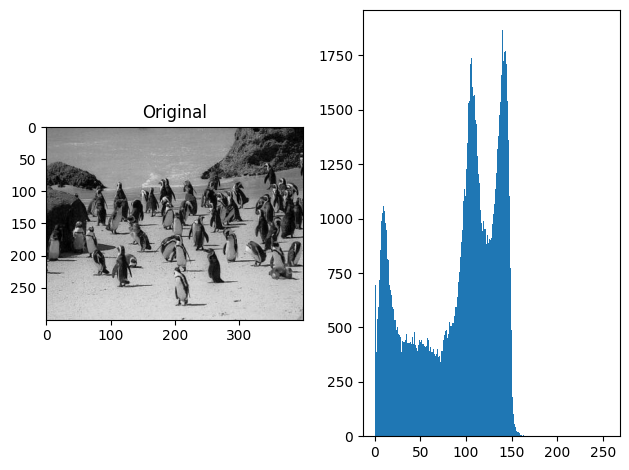

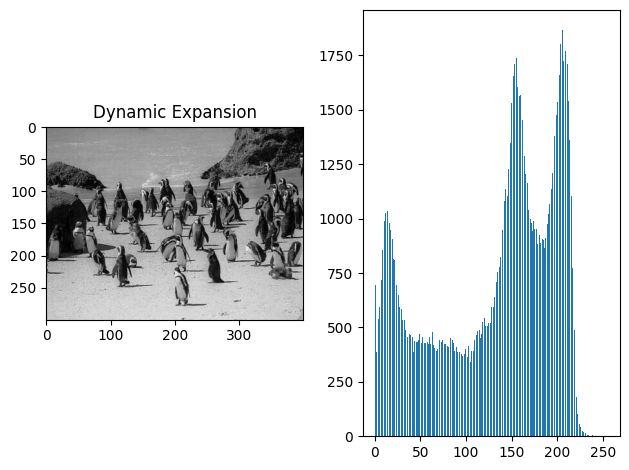

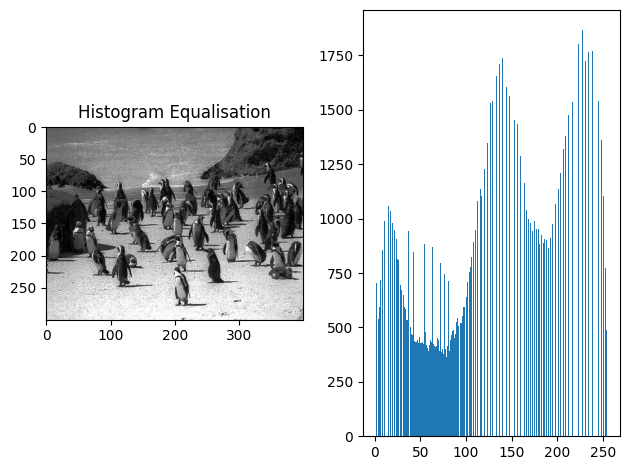

In [40]:
im_01 = _load("TP02-01.jpg")
plot_all(im_01)

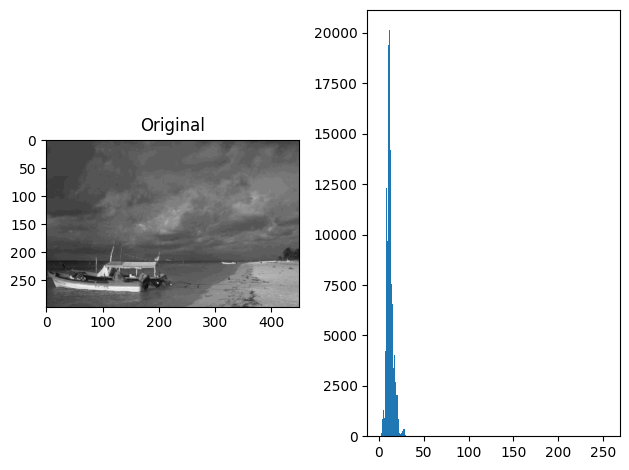

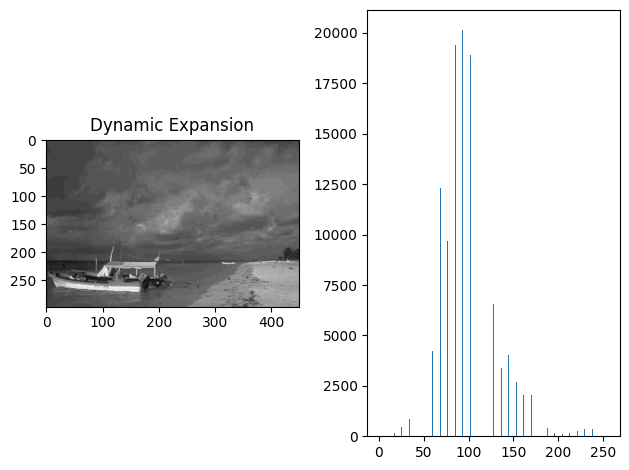

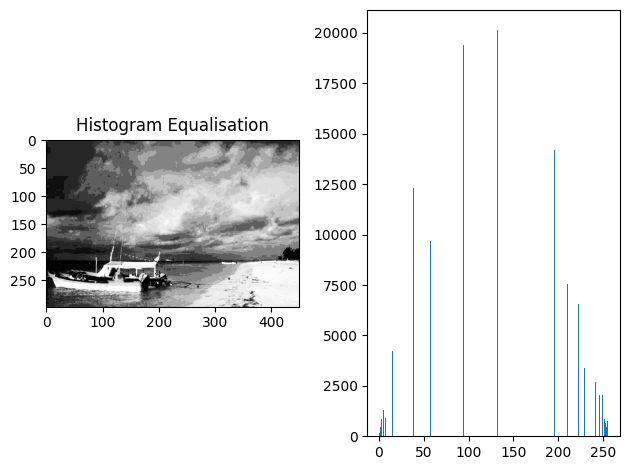

In [41]:
im_02 = _load("TP02-02.bmp")
plot_all(im_02)

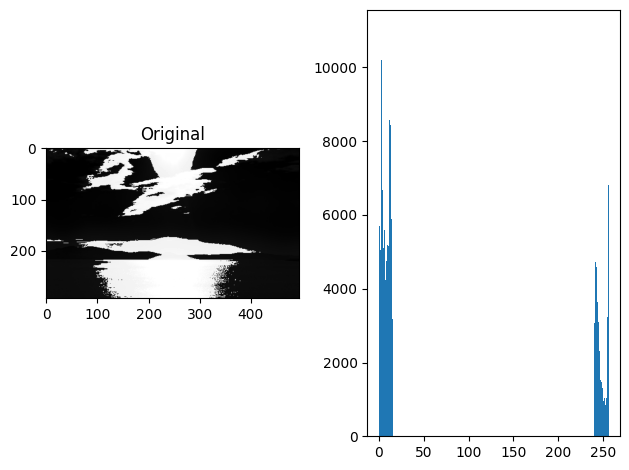

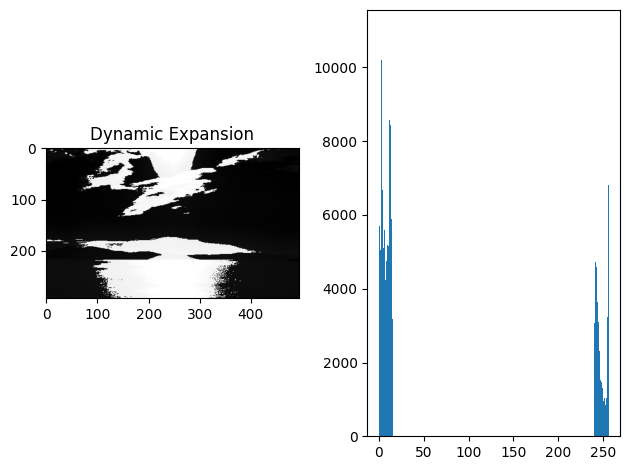

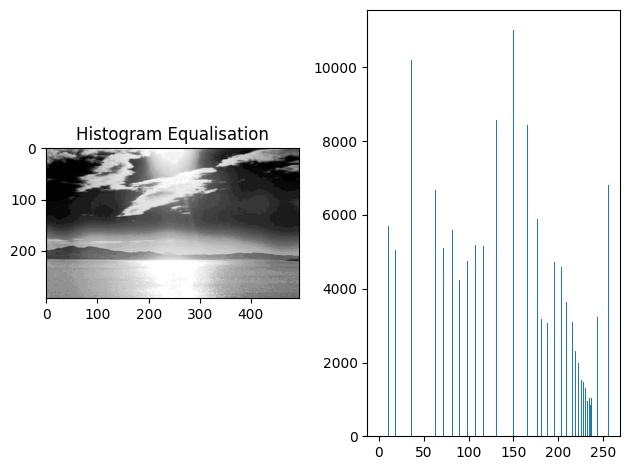

In [42]:
im_03 = _load("TP02-03.bmp")
plot_all(im_03)